In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
depth_map = np.load('vis_depth/0.2m_0_raw_meters.npy')

In [4]:
# Function to catch mouse clicks
def click_event(event, x, y, flags, params):
    # Check for left mouse click
    real_shape, resized_shape = params
    if event == cv2.EVENT_LBUTTONDOWN:
        real_x = int(x * (real_shape[1]/resized_shape[1]))
        real_y = int(y * (real_shape[0]/resized_shape[0]))
        coords.append((real_x, real_y))
        print(f"Pixel Coordinates: x={real_x}, y={real_y}")
        
        # Optionally draw a small circle where you clicked to confirm
        cv2.circle(resized_img, (x, y), 2, (0, 255, 0), -1)
        cv2.imshow("Select Ball Center", resized_img)

# Load one of your images
img = cv2.imread('./input_images/test/new/29.jpg')

coords = []

scale_percent = 20 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

real_shape = (img.shape[0], img.shape[1])
resized_shape = (resized_img.shape[0], resized_img.shape[1])

# Create a window and set the mouse callback
cv2.namedWindow("Select Ball Center", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Select Ball Center", click_event, param=(real_shape, resized_shape))

print("Click on the center of the ball. Press any key to close.")
cv2.imshow("Select Ball Center", resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Click on the center of the ball. Press any key to close.
Pixel Coordinates: x=1695, y=1261


In [ ]:
depth_map = np.load('./vis_depth/0.2m.npy')

sum = 0
for coord in coords:
    sum += depth_map[coord[1], coord[0]]
    # print(depth_map[coord[1], coord[0]])

depth_val = sum/len(coords)
print(f"Depth Value = {depth_val}")

Depth Value = 1.8110628128051758


In [ ]:
real_depth = [0.2,0.4,0.6,0.8,0.9]
relative_depth_value = [0.58, 0.84, 1.04, 1.32, 1.43]
new = [0.63, 0.89, 1.26, 1.47, 1.58]

slope, intercept = np.polyfit(new, real_depth, 1)

print(f"Slope = {slope}, Y Intercept = {intercept}")

Slope = 0.714645035527888, Y Intercept = -0.2532761114255172


In [ ]:
loaded_weights = np.load('./checkpoints/depth_model.npy')


predict_depth = np.poly1d(loaded_weights)


new_depth = predict_depth(0.53)

print(new_depth)

In [ ]:
dist = (depth_val - intercept) / slope
print(dist)

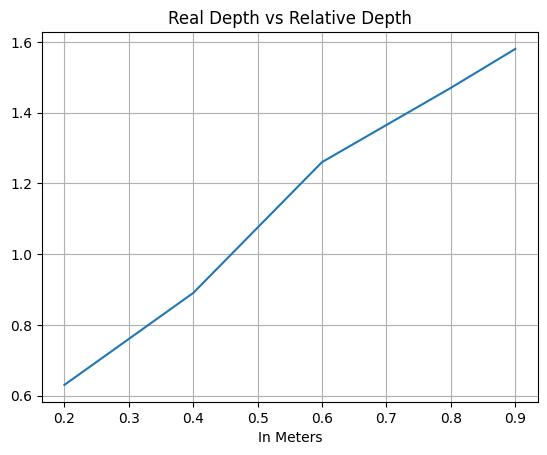

In [7]:
plt.plot(real_depth, new)
plt.xlabel("In Meters")
plt.title("Real Depth vs Relative Depth")
plt.grid(True)

In [ ]:
def get_ball_box_hsv(img):
    # 1. Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 2. Use your hardcoded trackbar values
    lower = np.array([0, 0, 128])
    upper = np.array([121, 160, 225])
    
    mask = cv2.inRange(hsv, lower, upper)
    
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_cnt)
        
        return np.array([x, y, x + w, y + h])
    
    return None

# --- Main Execution ---
img = cv2.imread('./input_images/test/2.jpg')
op = get_ball_box_hsv(img)

if op is not None:
    print(f"Ball detected at: {op}")
    # Visual check
    cv2.rectangle(img, (op[0], op[1]), (op[2], op[3]), (0, 255, 0), 10)
    # Resize just for viewing on your monitor
    view_img = cv2.resize(img, (0,0), fx=0.2, fy=0.2)
    plt.imshow("Detection Check", view_img)
    cv2.waitKey(0)
else:
    print("Ball not found. Check if HSV values need slight adjustment for this photo.")

# l-h = 0, l-s = 0, l-v = 128, u-h = 121, u-s = 160, u-v = 225

Ball detected at: [   0 2241 3472 4624]


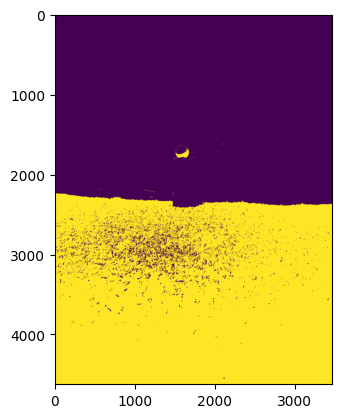

In [3]:
img = cv2.imread('./input_images/test/2.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower = np.array([0, 0, 128])
upper = np.array([121, 160, 225])

mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)

In [ ]:
img = cv2.imread("./input_images/test/2.jpg")

scale = 0.3 
img_small = cv2.resize(img, (0,0), fx=scale, fy=scale)

def nothing():
    pass

cv2.namedWindow("Trackbars")

cv2.createTrackbar("L - H", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 200, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - S", "Trackbars", 189, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)


while True:

    hsv = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")

    lower = np.array([l_h,l_s,l_v])
    upper = np.array([u_h,u_s,u_v])
    mask = cv2.inRange(hsv, lower, upper)

    result = cv2.bitwise_and(img_small, img_small, mask=mask)

    cv2.imshow("Mask", mask)
    cv2.imshow("Result", result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        # Print the final values so you can hardcode them into your main script
        print(f"Final Bounds: Lower[{l_h},{l_s},{l_v}], Upper[{u_h},{u_s},{u_v}]")
        break



In [ ]:
image_dict = {
    1: 0.04655236005783081,
    2: 0.042998895049095154,
    3: 0.028210921213030815,
    4: 0.04422654211521149,
    5: 0.0506054051220417,
    6: 0.052121181041002274,
    7: 0.04214807227253914,
    8: 0.04132093861699104,
    9: 0.041724588721990585,
    10: 0.04121733084321022,
    11: 0.030638668686151505,
    12: 0.03952522575855255,
    13: 0.04373503848910332,
    14: 0.04109998792409897,
    15: 0.0895359143614769,
    16: 0.031510964035987854,
    17: 0.03571489825844765,
    18: 0.05101509392261505,
    19: 0.04168328642845154,
    20: 0.050134025514125824
}

diff = 0
avg = 0
outlire = 0
for key, val in image_dict.items():
    if abs(0.04-val) < 0.02:
        diff = abs(0.04 - val)
    else:
        outlire += 1

avg = diff / (20-outlire)

print(avg)
print(outlire)
        

In [ ]:
data = {
    "1": 0.04664122356423167,
    "2": 0.04306742277283591,
    "3": 0.02656831713600792,
    "4": 0.042124282722969836,
    "5": 0.04988635059617151,
    "6": 0.05139789746886981,
    "7": 0.04184539774059773,
    "8": 0.04095692637942679,
    "9": 0.0408016388647102,
    "10": 0.03852774588328444,
    "11": 0.03020957480872239,
    "12": 0.03905226377801424,
    "13": 0.040853195384759955,
    "14": 0.04121234548764105,
    "15": 0.08958970162946914,
    "16": 0.03150244403089386,
    "17": 0.03577170592003869,
    "18": 0.05108382263361315,
    "19": 0.041831030846628446,
    "20": 0.048864088299668935
}